# Introduction to Visualization in yt

<div class="alert alert-block alert-info">
 
## Goals:

* Introduce `SlicePlot` class
* Learn how to annotate slice plots and change their style
    
</div>

In [1]:
import yt

We'll use the IsolatedGalaxy dataset for this tutorial.  The following line will download the dataset the first time it is run, and then simply use that downloaded copy each subsequent time.

In [2]:
ds = yt.load_sample("IsolatedGalaxy")

yt : [INFO     ] 2020-03-22 13:53:22,029 Files located at /home/zingale/.cache/yt/IsolatedGalaxy.tar.gz.untar/IsolatedGalaxy/galaxy0030/galaxy0030
yt : [INFO     ] 2020-03-22 13:53:22,030 Default to loading galaxy0030/galaxy0030 for IsolatedGalaxy dataset
yt : [INFO     ] 2020-03-22 13:53:22,149 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2020-03-22 13:53:22,149 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-03-22 13:53:22,150 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-03-22 13:53:22,151 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-03-22 13:53:22,152 Parameters: cosmological_simulation   = 0.0


yt is designed for visualizing and analysing *volumetric data*&mdash;this is data that has a location in a volume and associated data value(s)

There are many different plot types:

* slices
* projections
* line plots
* profiles
* phase plots
* volume rendering
* surfaces
* streamlines

For slice plots, the best references are:

* The Cookbook: https://yt-project.org/docs/dev/cookbook/simple_plots.html
* Visualization reference: https://yt-project.org/docs/dev/visualizing/plots.html#slice-plots
* SlicePlot API: https://yt-project.org/docs/dev/reference/api/yt.visualization.plot_window.html#yt.visualization.plot_window.SlicePlot

Let's start by seeing what fields are available for us to look at:

In [3]:
ds.field_list

Parsing Hierarchy : 100%|██████████| 173/173 [00:00<00:00, 1796.90it/s]
yt : [INFO     ] 2020-03-22 13:53:22,278 Gathering a field list (this may take a moment.)


[('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_type'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('enzo', 'Average_creation_time'),
 ('enzo', 'Bx'),
 ('enzo', 'By'),
 ('enzo', 'Bz'),
 ('enzo', 'Cooling_Time'),
 ('enzo', 'Dark_Matter_Density'),
 ('enzo', 'Density'),
 ('enzo', 'Electron_Density'),
 ('enzo', 'Forming_Stellar_Mass_Density'),
 ('enzo', 'Galaxy1Colour'),
 ('enzo', 'Galaxy2Colour'),
 ('enzo', 'HII_Density'),
 ('enzo', 'HI_Density'),
 ('enzo', 'HeIII_Density'),
 ('enzo', 'HeII_Density'),
 ('enzo', 'HeI_Density'),
 ('enzo', 'MBHColour'),
 ('enzo', 'Metal_Density'),
 ('enzo', 'PhiField'),
 ('enzo', 'Phi_pField'),
 ('enzo', 'SFR_Density'),
 ('enzo', 'Star_Particle_Density'),
 ('enzo', 'Temperature'),
 ('enzo', '

## First Slice Plot

Let's see what the default settings generate for a slice plot.

The minimal information we need to provide are:
* the dataset
* the orthogonal direction
* the field to visualize.

yt : [INFO     ] 2020-03-22 13:53:24,280 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:24,281 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:24,282 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:24,283 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:24,293 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



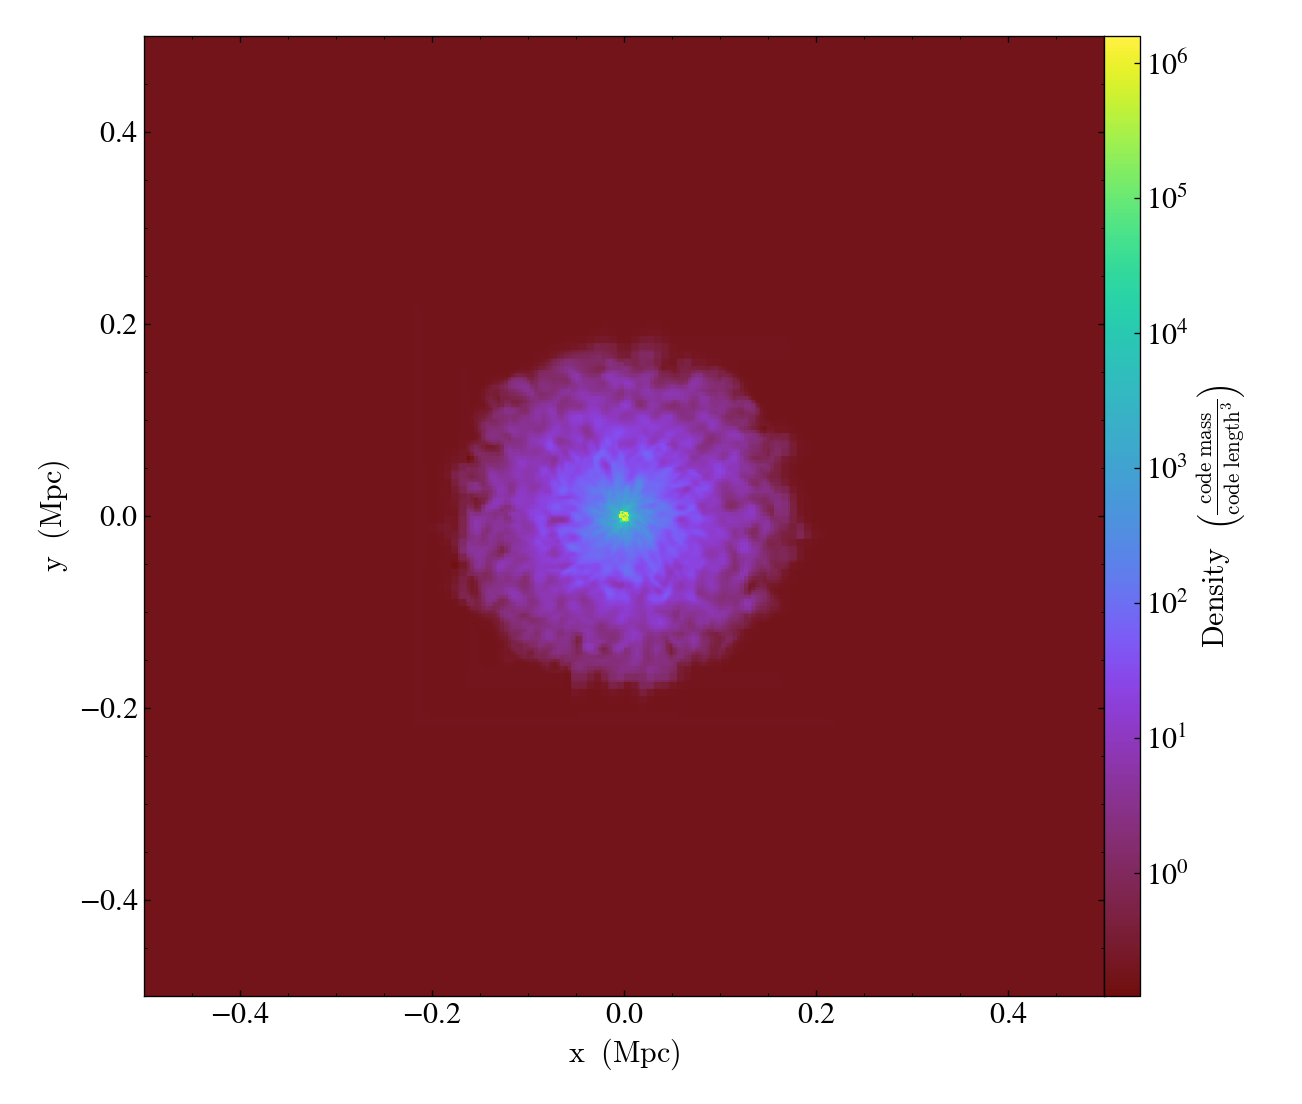

In [4]:
yt.SlicePlot(ds, "z", "Density")

There are a few things to note here:

* This is an example of an *axis-aligned slice plot*&mdash;we are using the natural coordinate axes of the dataset to define the slice normal.
* The coordinates have been shifted from their true values to have (0, 0) at the center.  This can be a big source of confusion, so we'll undo that below.
* The units appear on the axes and data range
* A log scale has been automatically applied to the data range.  This is true for most fields.

We can fix the coordinate problem by passing `origin = "native"` to `SlicePlot`:

yt : [INFO     ] 2020-03-22 13:53:26,015 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:26,016 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:26,017 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:26,018 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:26,021 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



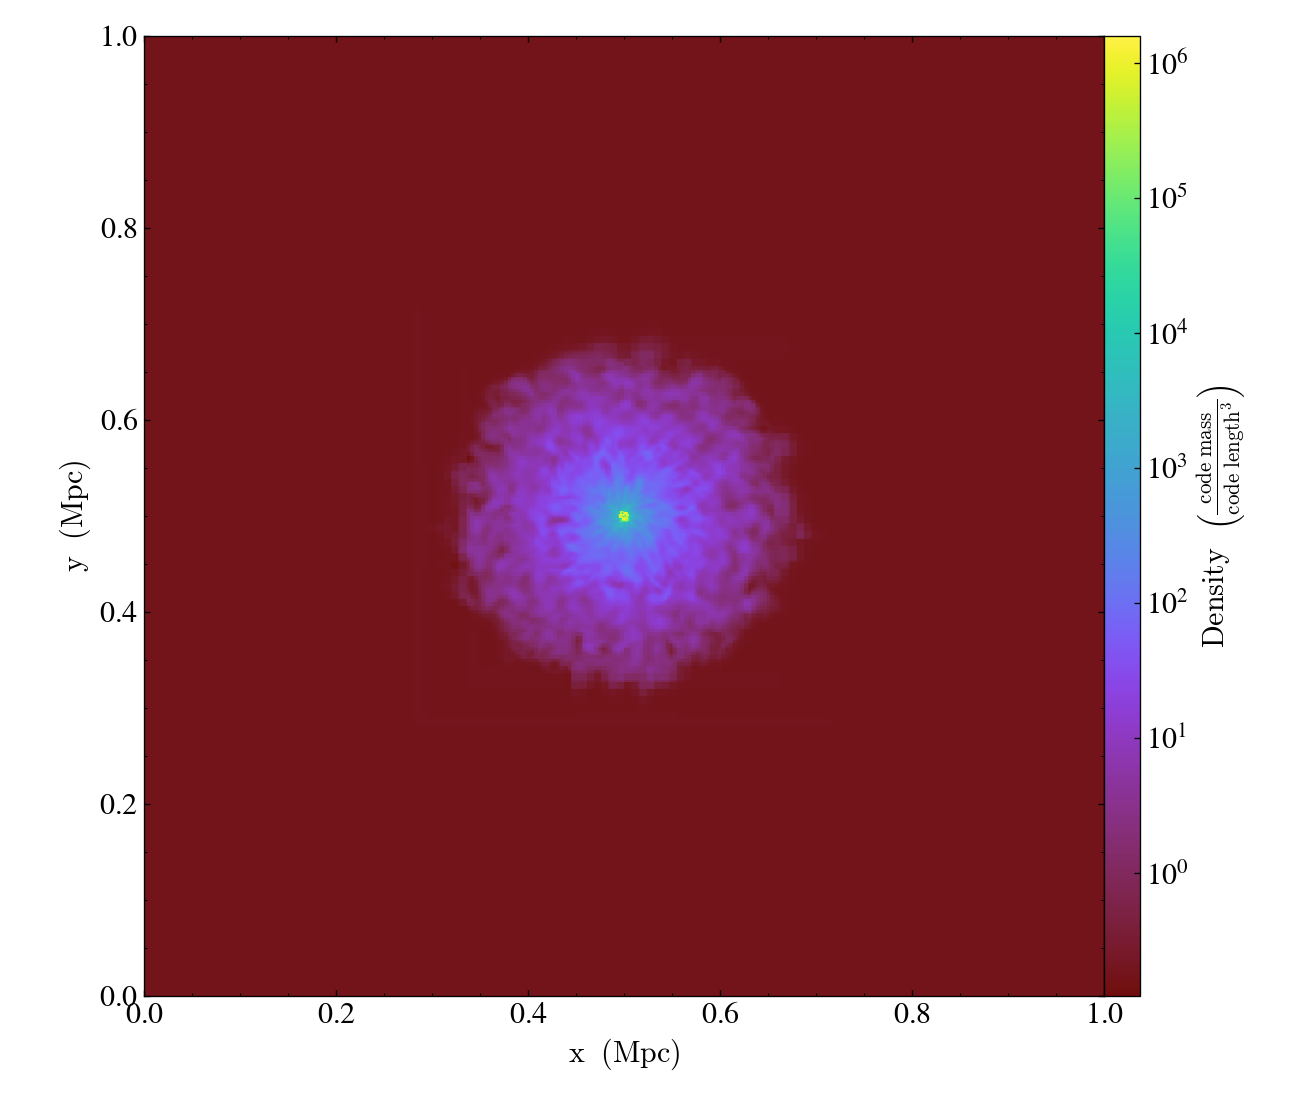

In [5]:
sp = yt.SlicePlot(ds, "z", "Density", origin="native")
sp

Here we stored the output of `SlicePlot` in a variable, `sp`.  Let's look at its type:

In [6]:
type(sp)

yt.visualization.plot_window.AxisAlignedSlicePlot

This tells us that it is an `AxisAlignedSlicePlot` object.  If you do
```
help(sp)
```
you'll get more information about how to use it, methods that can apply to it, and see that it shares its styling with the `PlotWindow` class.

We'll use the object returned from `SlicePlot` to style and annotate the plot

## Saving to image

You can save the slice plot to an image using the `.save()` method

In [7]:
sp.save("my_slice.png")

yt : [INFO     ] 2020-03-22 13:53:26,842 Saving plot my_slice.png


['my_slice.png']

In [8]:
!ls -l *.png
!identify my_slice.png

-rw-rw-r--. 1 zingale zingale 144787 Mar 22 13:45 multiplot.png
-rw-rw-r--. 1 zingale zingale 105640 Mar 22 13:53 my_slice.png
my_slice.png PNG 1302x1104 1302x1104+0+0 8-bit sRGB 105640B 0.000u 0:00.000


## Data Limits and Colors

Often we want to just look at a small range of the data to highlight details.  The `.set_zlim()` method allows us to set the minimum and maximum


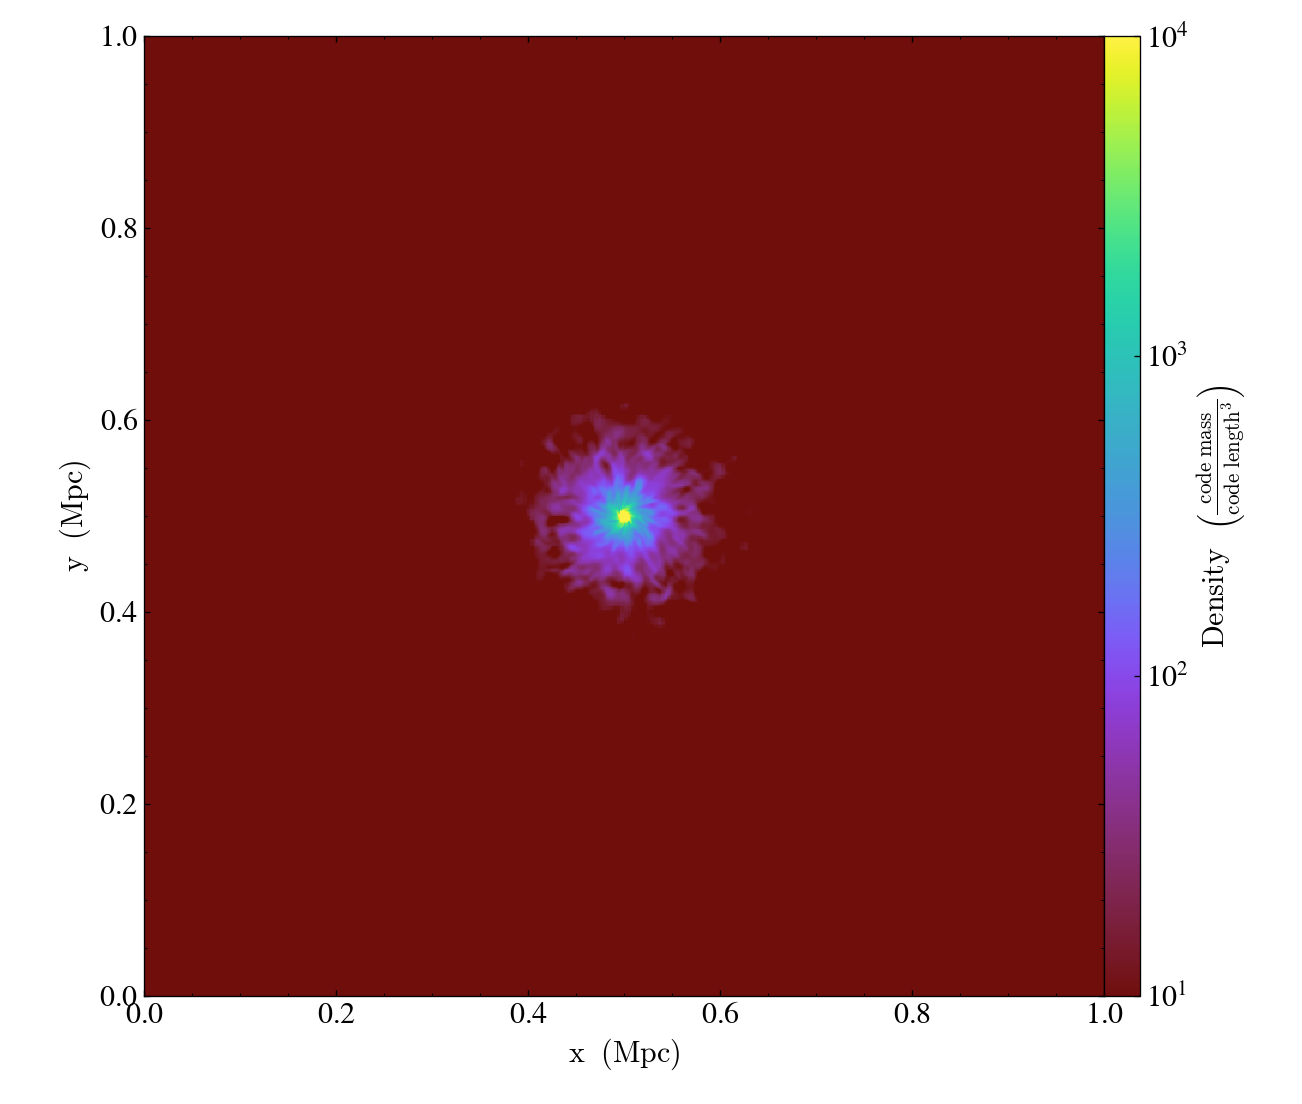

In [9]:
sp.set_zlim("Density", 10, 1.e4)

Similarly we can change the colormap using the `.set_cmap()` function.  The default colormap is called `"arbre".  `See https://yt-project.org/doc/visualizing/colormaps/index.html#all-colormaps-including-matplotlib for the list of colormaps


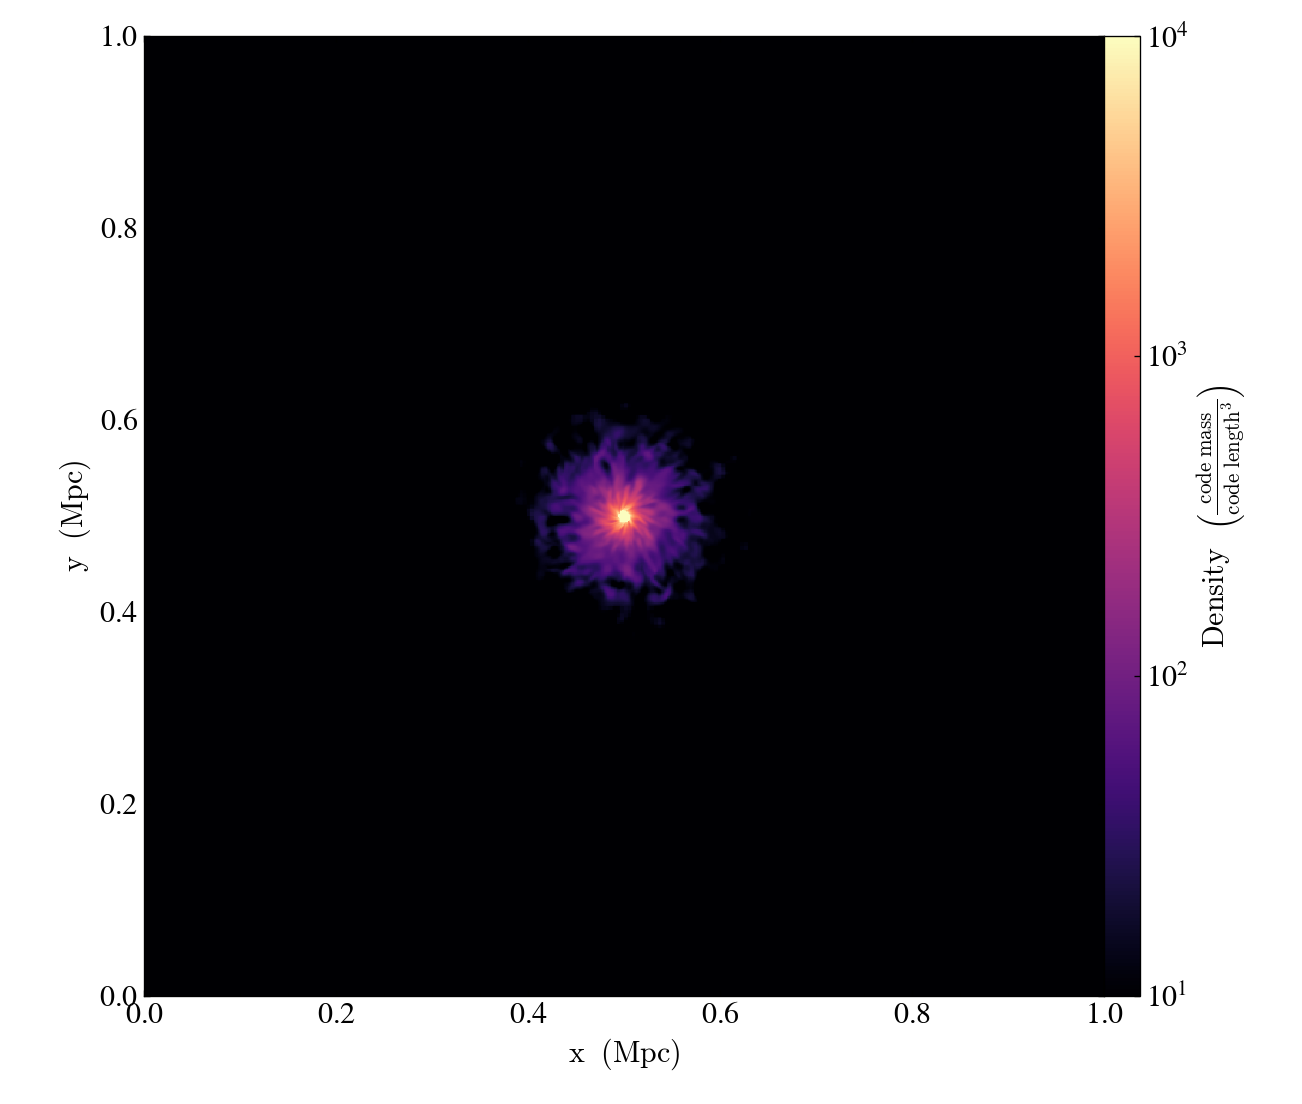

In [10]:
sp.set_cmap("Density", "magma")

## Zooming and resizing

If we want to zoom by a particular factor, we can use the `.zoom()` method.  

Note, if we use `.zoom()` several times on a `SlicePlot` object, each instance works from the last magnification, not the original plot.

yt : [INFO     ] 2020-03-22 13:53:29,394 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:29,396 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:29,399 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:29,400 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:29,403 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800
yt : [INFO     ] 2020-03-22 13:53:29,708 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



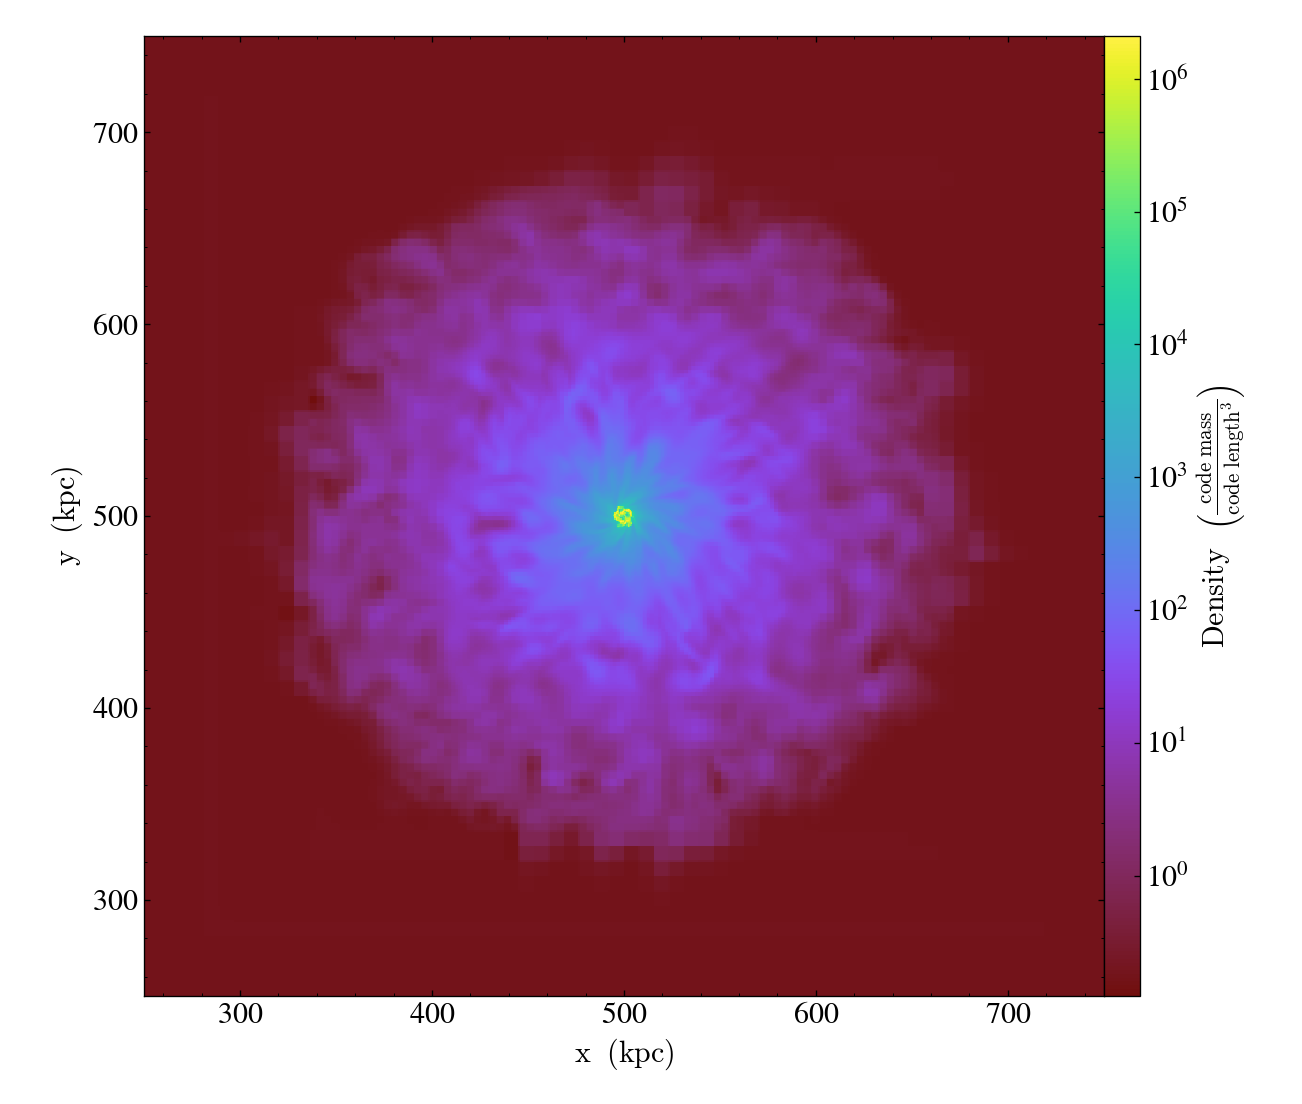

In [11]:
sp = yt.SlicePlot(ds, "z", "Density", origin="native")
sp.zoom(2)

yt : [INFO     ] 2020-03-22 13:53:30,682 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



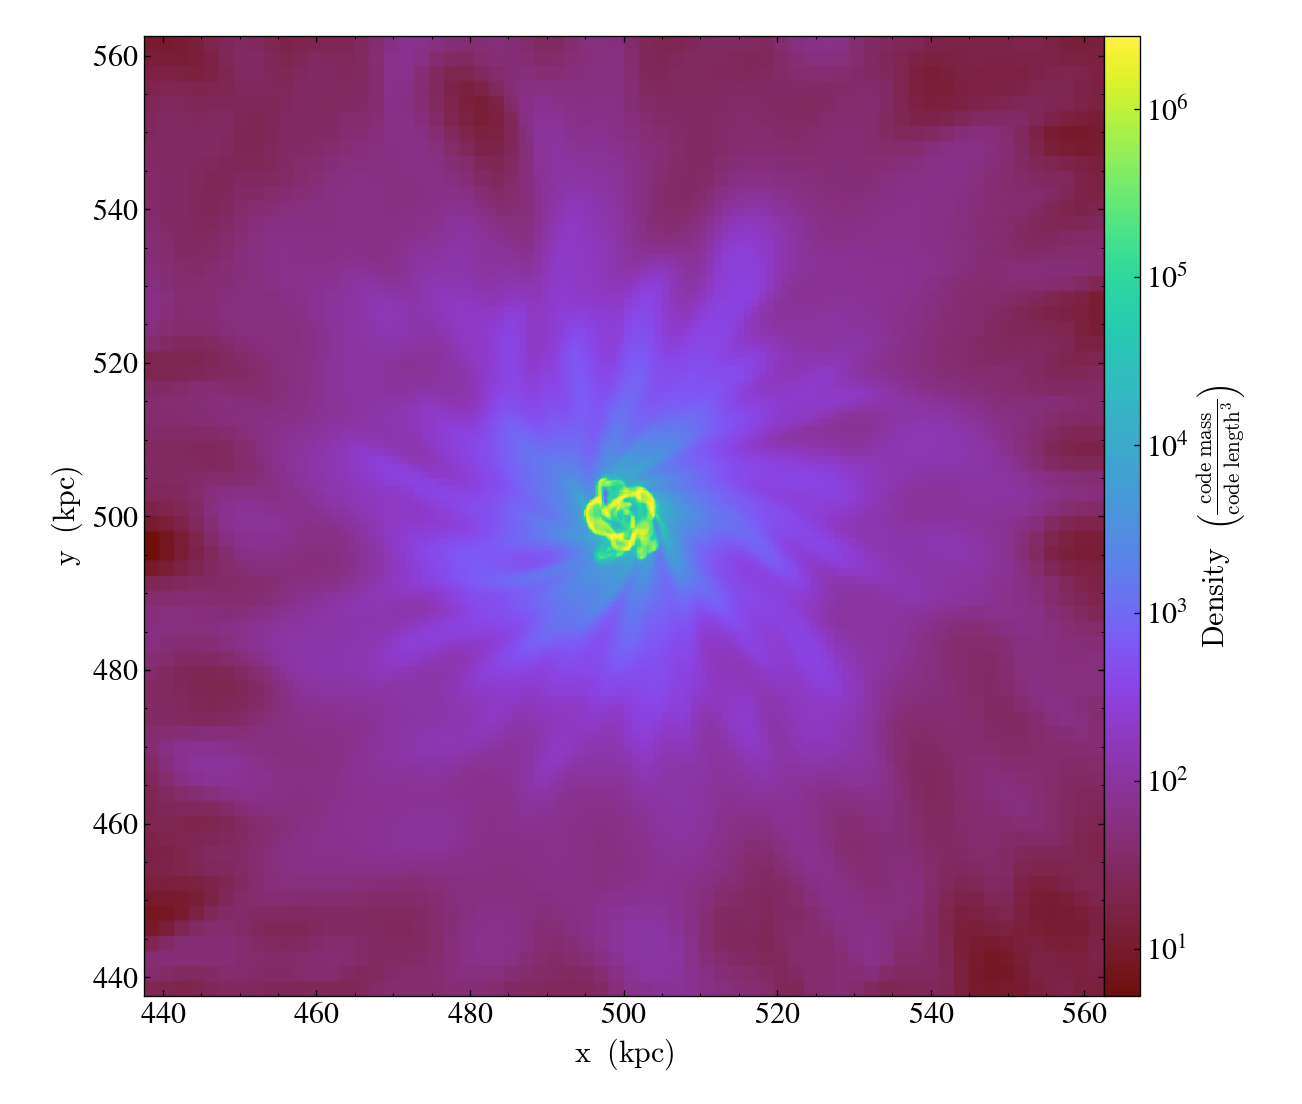

In [12]:
sp.zoom(4)

yt : [INFO     ] 2020-03-22 13:53:31,616 Making a fixed resolution buffer of (('enzo', 'Density')) 800 by 800



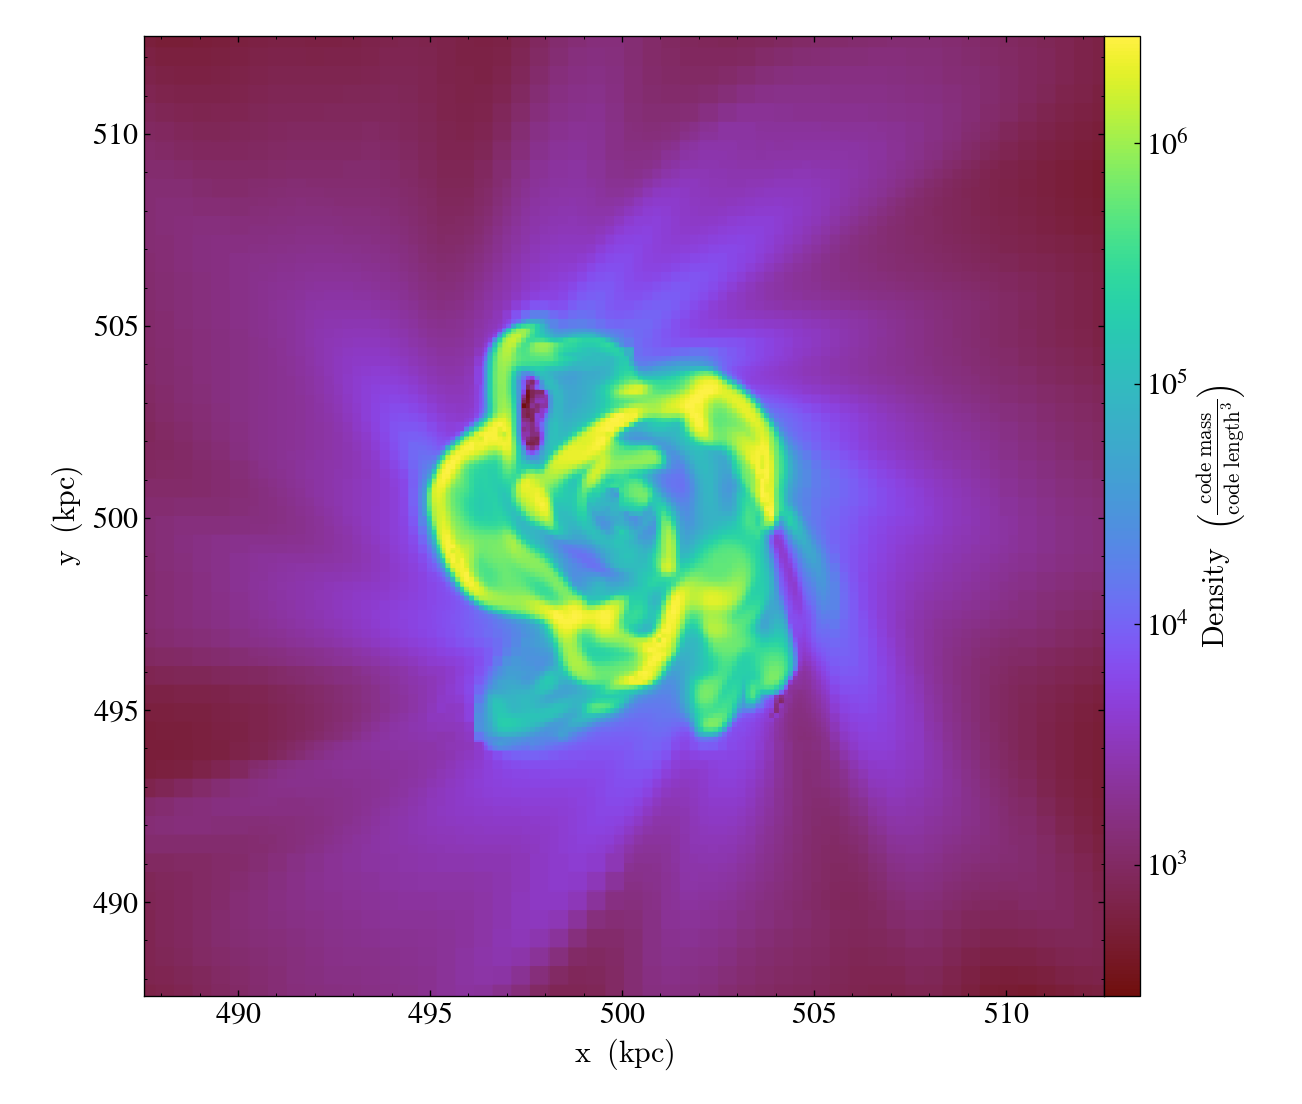

In [13]:
sp.zoom(5)

Let's regenerate it without any zoom

yt : [INFO     ] 2020-03-22 13:53:32,546 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:32,546 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:32,551 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:32,552 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:32,555 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



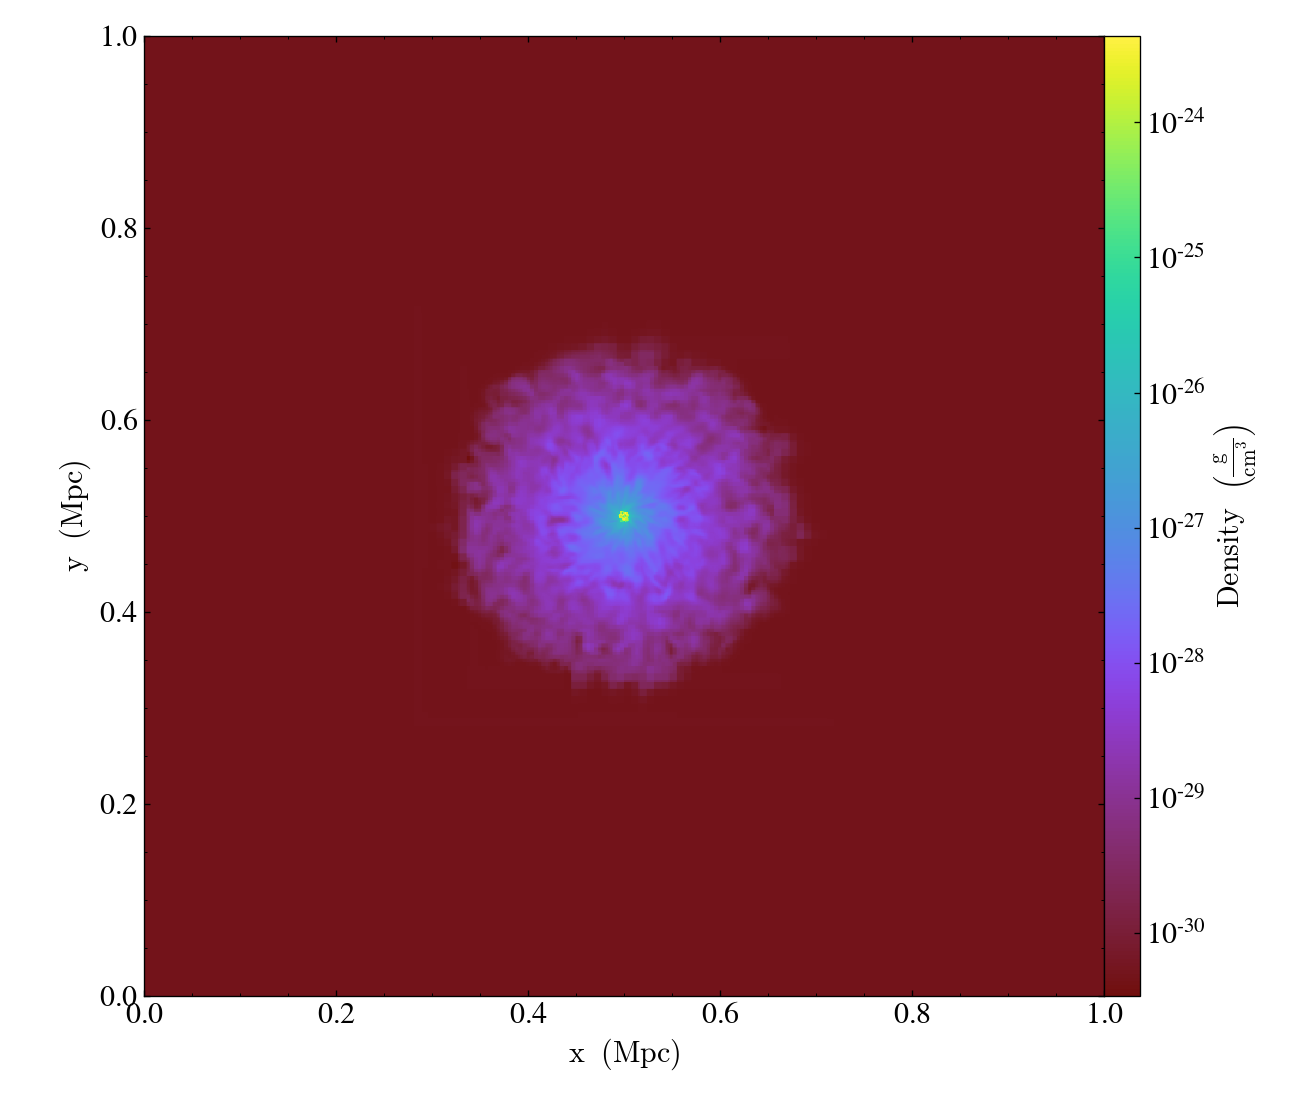

In [14]:
sp = yt.SlicePlot(ds, "z", "density", origin="native")
sp

Now let's change the zoom by specifying a width explicitly (in physical units) and the center of the slice

yt : [INFO     ] 2020-03-22 13:53:33,321 xlim = -100.052244 900.052244
yt : [INFO     ] 2020-03-22 13:53:33,323 ylim = -100.052244 900.052244
yt : [INFO     ] 2020-03-22 13:53:33,325 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2020-03-22 13:53:33,343 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



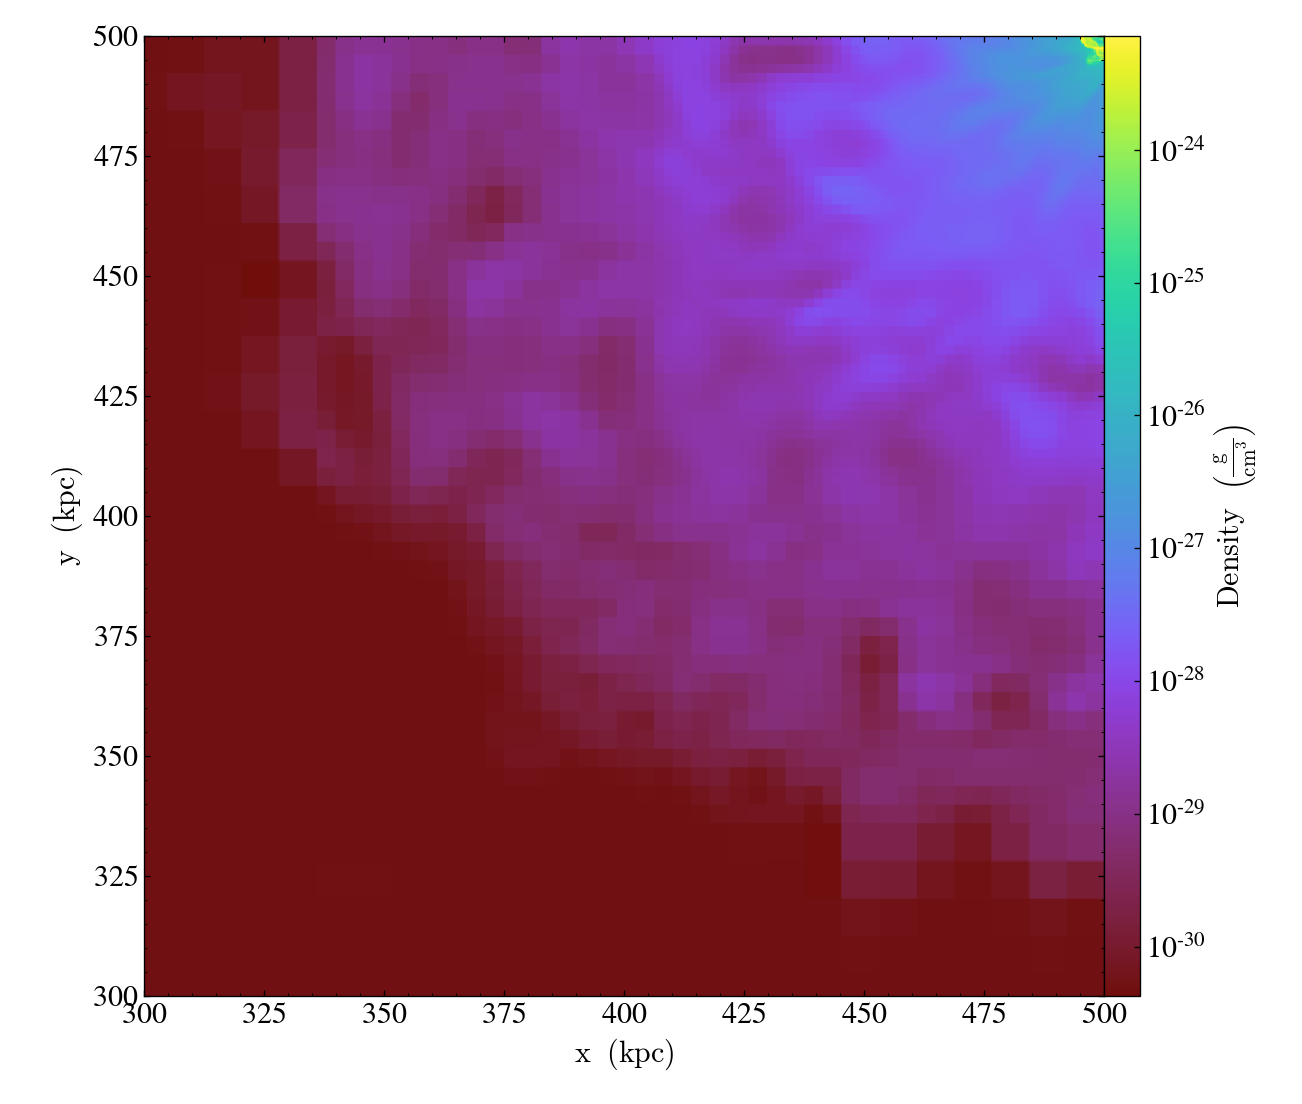

In [15]:
from yt.units import kpc
sp.set_center((400, 400), unit=kpc)
sp.set_width(200*kpc)

Note that when we use `.set_center()`, as above, we only specify 2 coordinate values&mdash;these are in the slice plane.

Alternately, if we specify the center when creating the slice plot, then we specify all 3 coordinates of the center&mdash;this allows us to select the z-coordinate that the slice plane passes through

yt : [INFO     ] 2020-03-22 13:53:34,082 xlim = 300.000000 500.000000
yt : [INFO     ] 2020-03-22 13:53:34,083 ylim = 300.000000 500.000000
yt : [INFO     ] 2020-03-22 13:53:34,085 xlim = 0.299969 0.499948
yt : [INFO     ] 2020-03-22 13:53:34,086 ylim = 0.299969 0.499948
yt : [INFO     ] 2020-03-22 13:53:34,089 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



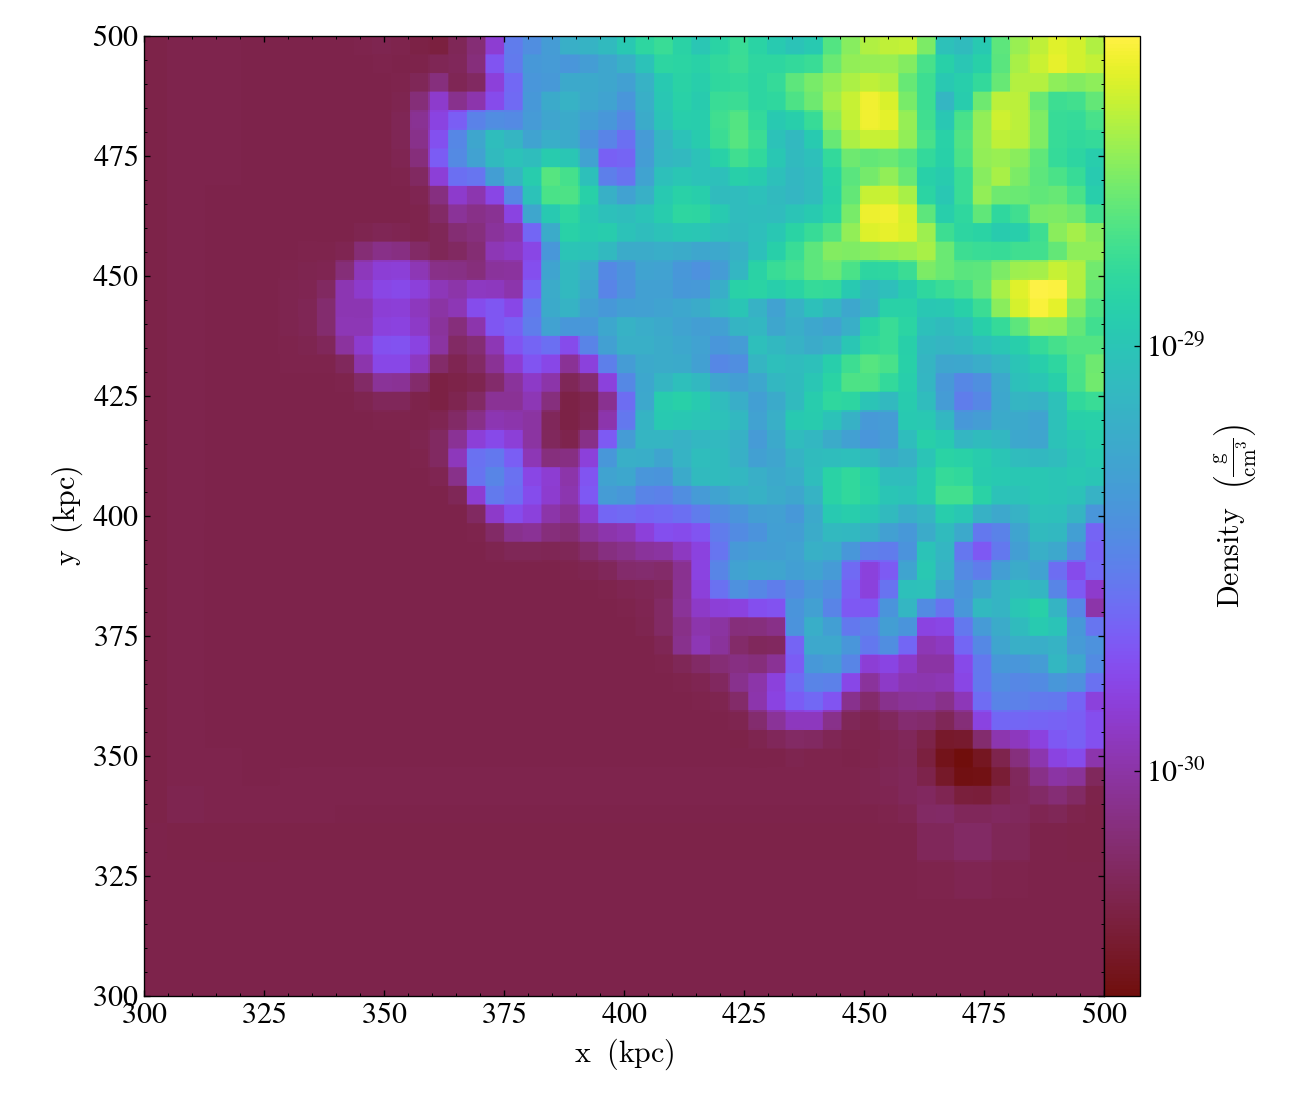

In [16]:
sp = yt.SlicePlot(ds, "z", "density",
                  center=(400*kpc, 400*kpc, 400*kpc), width=(200, kpc),
                  origin="native")
sp

<div class="alert alert-block alert-warning">

## Afternoon Exercise
    
There are many other ways to specify the center of the domain, including based on the extrema of other fields.  These are valid values for the `center` keyword option:

* `"center"`, `"c"`: the domain center

* `"max"`, `"m"`: the position of the maximum density

* `("min", field)`: the position of the minimum of field

* `("max", field)`: the position of the maximum of field 
    
Modify the slice plot above to place the center where the temperature is highest
</div>

## Multiple Fields

`SlicePlot` can take a sequence of fields (e.g. a list or tuple) and generate the slices for all these fields.  Combined with the layout capabilities of matplotlib, it is straightforward to generate multipanel plots.

For this example, we'll use the matplotlib `ImageGrid` (https://matplotlib.org/3.1.0/tutorials/toolkits/axes_grid.html)

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

First we'll create a figure and the axes that live in that figure.  We'll do a grid with 2 rows and 2 columns

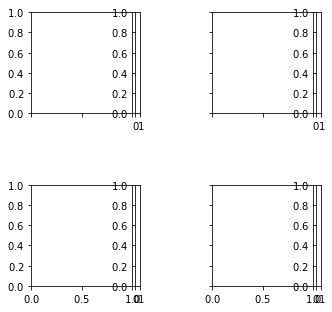

In [18]:
fig = plt.figure()
grid = ImageGrid(fig, (0.05, 0.05, 0.95, 0.95),
                 nrows_ncols=(2,2),
                 axes_pad=1.0,
                 label_mode="L",
                 cbar_mode="each", cbar_pad="3%")

We'll specify the fields we want and generate the slice plot object.  

Note, for the velocity, we will turn off the log of the data values.

yt : [INFO     ] 2020-03-22 13:53:36,664 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:36,664 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:36,665 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:36,666 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:36,667 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2020-03-22 13:53:36,714 Making a fixed resolution buffer of (('gas', 'velocity_x')) 800 by 800
yt : [INFO     ] 2020-03-22 13:53:36,727 Making a fixed resolution buffer of (('gas', 'velocity_y')) 800 by 800
yt : [INFO     ] 2020-03-22 13:53:36,745 Making a fixed resolution buffer of (('gas', 'velocity_magnitude')) 800 by 800
yt : [WARNING  ] 2020-03-22 13:53:36,784 Plot image for field ('gas', 'velocity_y') has both positive and negative values. Min = -26185289.640781, Max = 24335429.389855.
yt : [WARNING  ] 2020-03-22 13:53:36,789 Switching to symlog colorbar scaling unless linear scaling is specified 


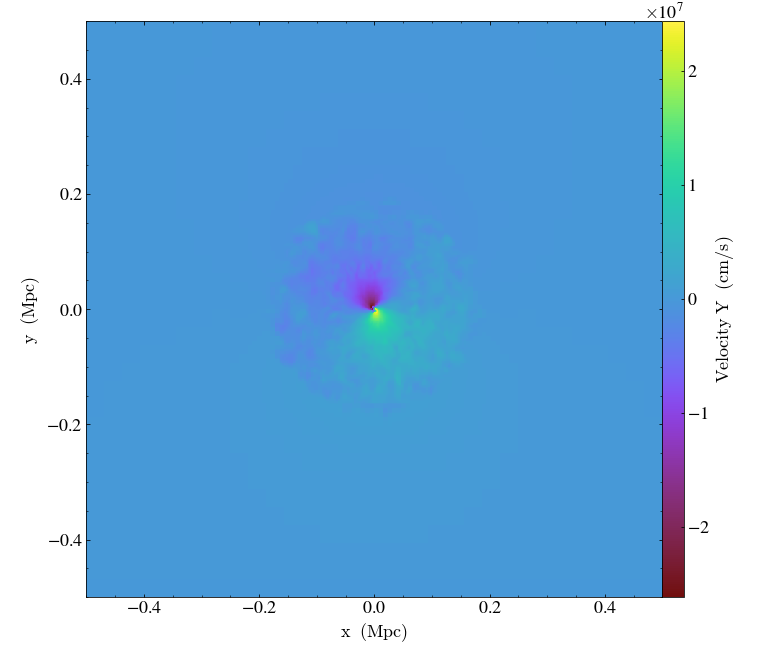
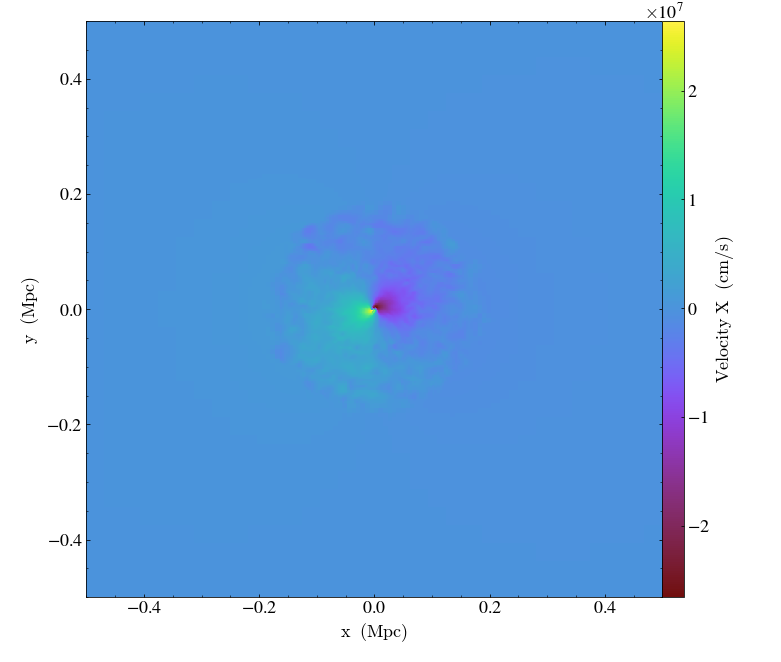
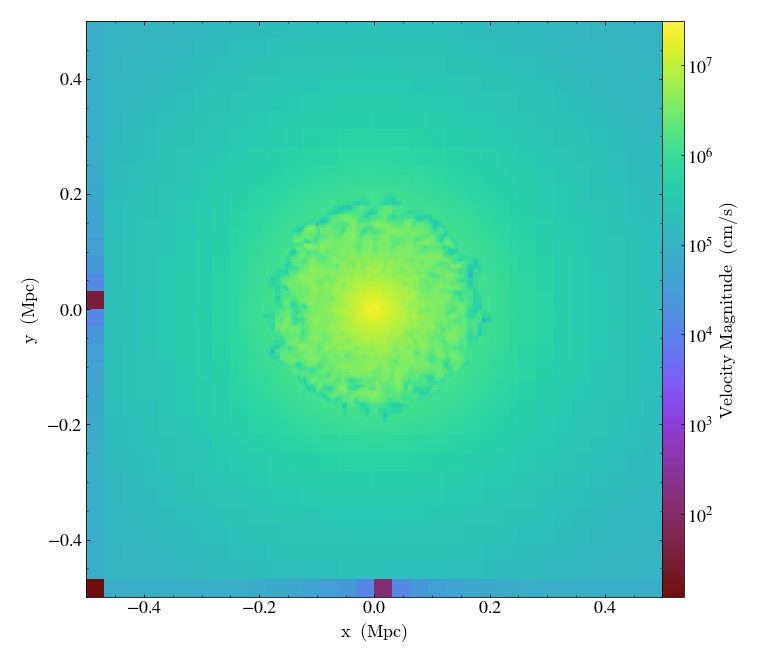
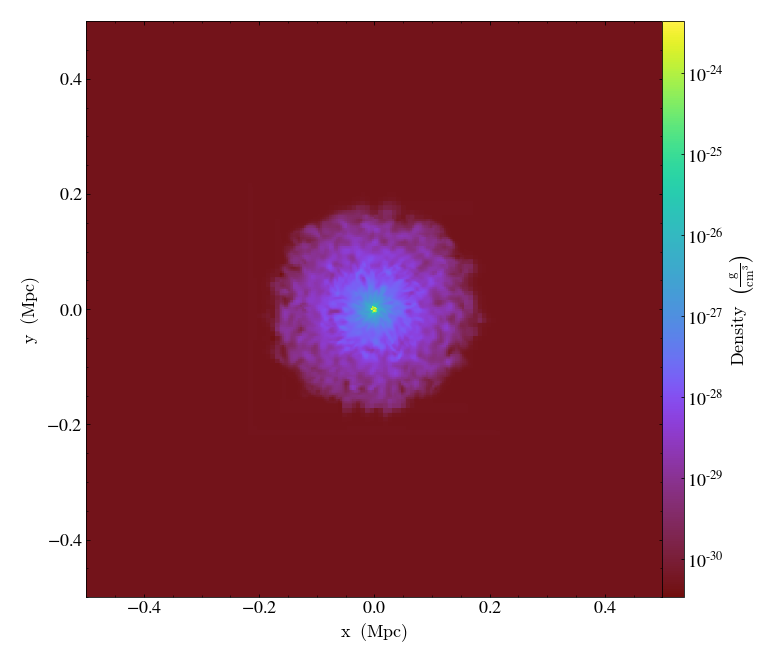

In [19]:
fields = ['density', 'velocity_x', 'velocity_y', 'velocity_magnitude']
p = yt.SlicePlot(ds, 'z', fields)
p.set_log('velocity_x', False)
p.set_log('velocity_y', False)

So far so good, but they are currently 4 separate plots.  To group them together in a single figure, we need to use some matplotlib layout functions.

We will loop over the individal plots in our slice plot object, `p`, and assign their underlying figure and axis to correspond to the ImageGrid we just created.

Splitting up across cells in a notebook can cause the state to get a little lost, so we'll refresh our plot by zooming all of the slices&mdash;we can do that in a single call.

In [20]:
p.zoom(2)

for i, field in enumerate(fields):
    plot = p.plots[field]
    plot.figure = fig
    plot.axes = grid[i].axes
    plot.cax = grid.cbar_axes[i]

# Finally, redraw the plot on the AxesGrid axes.
p._setup_plots()

yt : [INFO     ] 2020-03-22 13:53:39,902 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2020-03-22 13:53:39,917 Making a fixed resolution buffer of (('gas', 'velocity_x')) 800 by 800
yt : [INFO     ] 2020-03-22 13:53:39,930 Making a fixed resolution buffer of (('gas', 'velocity_y')) 800 by 800
yt : [INFO     ] 2020-03-22 13:53:39,946 Making a fixed resolution buffer of (('gas', 'velocity_magnitude')) 800 by 800


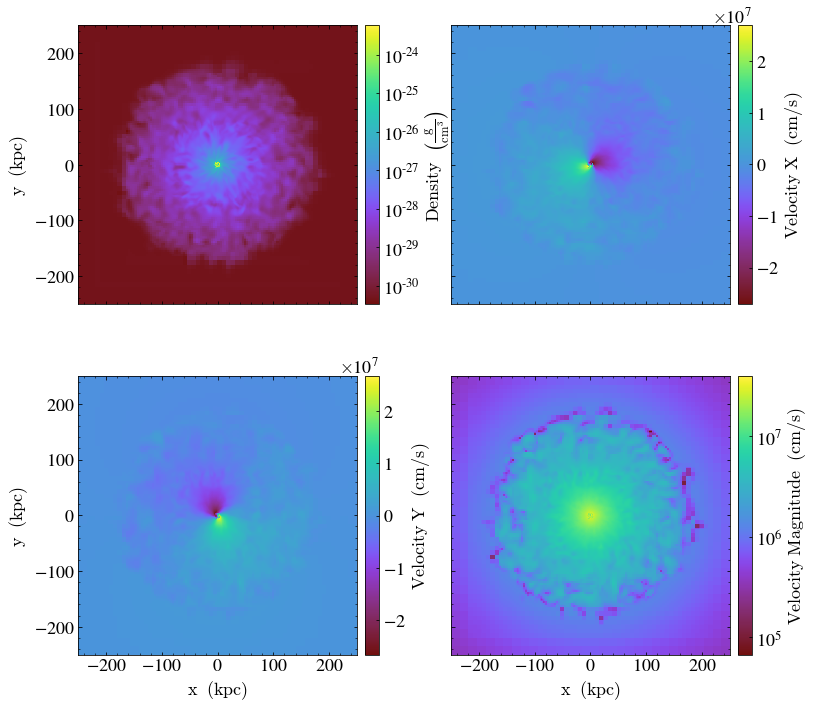

In [21]:
fig

We can save the figure by using the matplotlib `.savefig()` method

In [22]:
fig.savefig("multiplot.png")

<div class="alert alert-block alert-info">
 
### More Advanced Operations:

If you want to control every aspect of the layout, you will need to use the `FixedResolutionBuffer`.  See this recipe for an example on how to work with that:
 https://yt-project.org/docs/dev/cookbook/complex_plots.html#advanced-multi-plot-multi-panel   
</div>

## Showing the Velocity Field

The method `annotate_velocity()` will show velocity vectors on the image

yt : [INFO     ] 2020-03-22 13:53:44,958 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:44,960 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:44,961 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:44,962 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:44,964 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2020-03-22 13:53:45,382 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



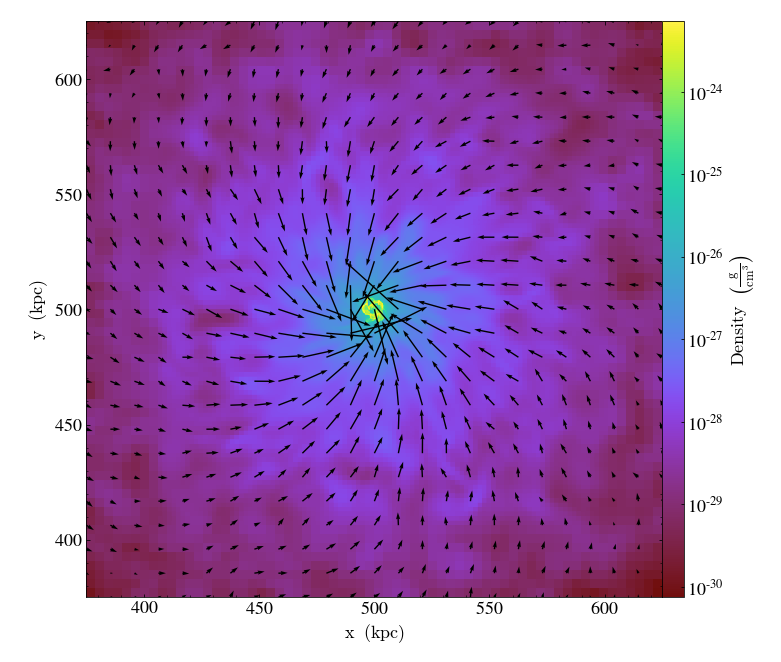

In [23]:
sp = yt.SlicePlot(ds, "z", "density", origin="native")
sp.zoom(4)
sp.annotate_velocity(factor=32)

<div class="alert alert-block alert-warning">

## Afternoon Exercise
    
When the velocity field varies a lot in magnitude, the velocity structure can be hard to see.  Look at the docs for `annotate_velocity()` and experiment with the `normalize` and `scale` options.
</div>

## Visualizing the Grid

Often we want to visualize the patch structure (if using AMR) to understand where refinement is being done and what the domain decomposition looks like.  The `.annotate_grids()` method does this

yt : [INFO     ] 2020-03-22 13:53:46,155 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:46,156 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:46,157 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:46,158 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-03-22 13:53:46,160 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2020-03-22 13:53:46,376 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [WARNING  ] 2020-03-22 13:53:46,641 Supplied id_loc but draw_ids is False. Not drawing grid ids
yt : [WARNING  ] 2020-03-22 13:53:46,645 Supplied id_loc but draw_ids is False. Not drawing grid ids
yt : [WARNING  ] 2020-03-22 13:53:46,656 Supplied id_loc but draw_ids is False. Not drawing grid ids
yt : [WARNING  ] 2020-03-22 13:53:46,664 Supplied id_loc but draw_ids is False. Not drawing grid ids
yt : [WARNING  ] 2020-03-22 13:53:46,670 Supplied id_loc but draw_ids is False. Not drawing grid ids
yt : [WARNING


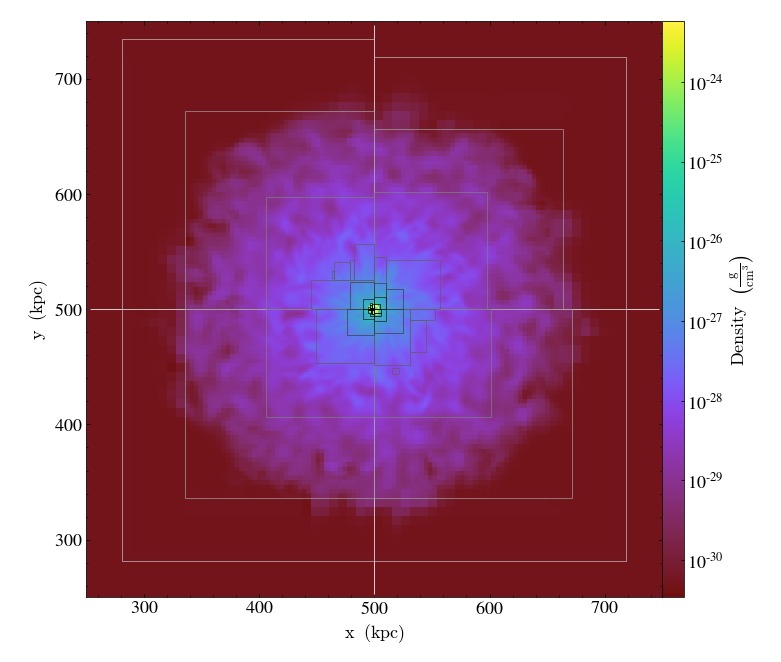

In [24]:
sp = yt.SlicePlot(ds, "z", "density", origin="native")
sp.zoom(2)
sp.annotate_grids()

<div class="alert alert-block alert-warning">

## Afternoon Exercise
    
There are many more styling options.  Look at the docs for:
* `anotate_sphere()`
* `annotate_contour()`
* `annotate_streamlines()`
    
and experiment adding these annotations to your slices
</div>

## 2-D and Axisymmetric Data

A final note: for 2-d data, there is a simpler wrapper, `plot_2d`:
https://yt-project.org/docs/dev/reference/api/yt.visualization.plot_window.html#yt.visualization.plot_window.plot_2d

You can also still use the full `SlicePlot` interface.  Note: for 2-d axisymmetric data, where you modeled the $r$ and $z$ coordinates, you pass `theta` as the normal direction in the `SlicePlot` interface.